In [13]:
from PEPit import PEP
from PEPit.primitive_steps import inexact_gradient_step
from PEPit.functions import SmoothStronglyConvexQuadraticFunction

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def wc_gradient_descent(L, mu, gamma, alpha, n, wrapper="cvxpy", solver=None, verbose=1):
    problem = PEP()
    func = problem.declare_function(SmoothStronglyConvexQuadraticFunction, L=L, mu=mu)
    xs = func.stationary_point()
    fs = func(xs)
    x0 = problem.set_initial_point()

    problem.set_initial_condition((x0 - xs) ** 2 <= 10)

    x = x0
    for _ in range(n):
        x, _, _ = inexact_gradient_step(x, func, gamma=gamma, epsilon=alpha, notion = 'relative')

    problem.set_performance_metric(func(x) - fs)

    pepit_tau = problem.solve(wrapper=wrapper, solver=solver, verbose=False)

    if verbose != -1:
        print('\tPEPit guarantee:\t\t f(x_n)-f_* <= {:.6} ||x_0 - x_*||^2'.format(pepit_tau))
        
    return pepit_tau


In [15]:
mu = 1
L = 10
alpha = 0.99
gamma = (((1 - alpha) / (1 + alpha)) ** (3 / 2)) / L

pepit_tau = wc_gradient_descent(L=L, mu=mu, alpha=alpha, gamma=gamma, n=10, wrapper="cvxpy", solver=None, verbose=False)

print(pepit_tau)

	PEPit guarantee:		 f(x_n)-f_* <= 50.0231 ||x_0 - x_*||^2
50.023090490512914


/home/eg-av/.local/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


(PEPit) Warning: the duality gap seems surprisingly large and negative.
		The solver might not have converged properly.
		We recommend to use another solver for confirmation.


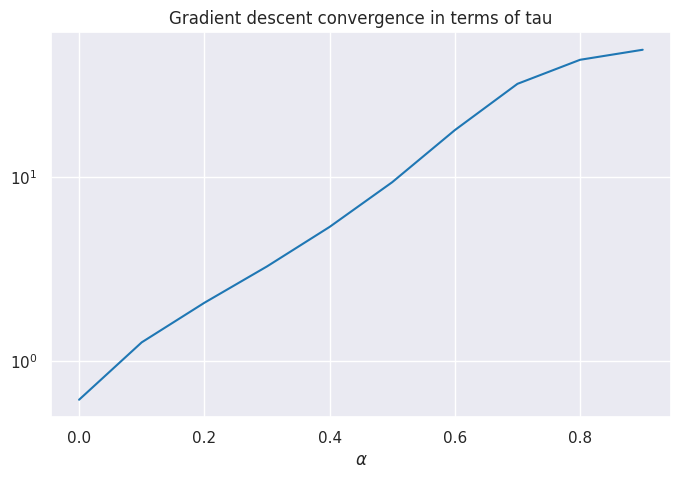

In [17]:
with sns.plotting_context('notebook'), sns.axes_style('darkgrid'):
    plt.figure(figsize=(8, 5))
    alpha_grid = np.arange(0, 1, 0.1)
    taus = []
    mu = 1
    L = 10
    for alpha in alpha_grid:
        gamma = (((1 - alpha) / (1 + alpha)) ** (3 / 2)) / L
        taus.append(wc_gradient_descent(L=L, mu=mu, alpha=alpha, gamma=gamma, n=10, wrapper="cvxpy", solver=None, verbose=-1))
    plt.semilogy(alpha_grid, taus)
    plt.title(f"Gradient descent convergence in terms of tau")
    plt.xlabel(r"$\alpha$")
    plt.show()
